## *Descripción e instrucciones*

La implementación está diseñada para ser ejecutada desde google colab, pero puede ejecutarse de forma local siempre que se tengan instalados los requisitos preestablecidos.

Es necesario establecer un conjunto de directorios para interacturar con las funciones. Ya que al segmentar o aplicar filtros, los resultados se guardan en distintas carpetas y se leen por el siguiente método correspondiente. Se aplicaron dos preprocesos para un mejor control en la calidad de la salida.

Hay que adaptar estos directorios a las rutas adecuadas según el usuario que utilice el notebook.

Los directorios necesarios son:

- *im_dir*: contiene las imágenes a procesar. 
- *imagenes_segmentadas*: contiene las imágenes después de extraer las regiones que contienen texto
- *imagenes_Preproceso1*: contiene las imágenes después de aplicar un primer preproceso
- *imagenes_Preproceso2*: contiene las imágenes después de aplicar un segundo preproceso
- *archivos_texto*: contiene los archivos de texto de las transcripciones obtenidas

Por otra parte, se debe especificar las rutas de acceso a los archivos .csv que contienen información sobre las transcripciones (para medir la calidad de la extracción) y las entidades conocidas.

- *JusticIA_DatosTranscripciones.csv*
- *civilservants.csv*
- *organizations.csv*
- *places.csv*
- *prosecuted.csv*

# Instalación de librerias necesarias 
Estas librerias se mencionan en el archivo `requirements.txt`. 

**NOTA:** Si se usa colab, se debe reiniciar el entorno de ejecución después de la instalación.

In [1]:
# Pre-requisitos para instalar Kraken
!pip uninstall tensorflow -y
!pip install  tensorflow==2.3.1
!pip uninstall Keras -y
!pip install Keras==2.2.4
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.19.2
!pip uninstall scikit-image -y
!pip install scikit-image==0.18.2

#Kraken para segmentación de imágenes
!pip install kraken

#paquetes necesarios en linux para usar tesseract
! apt install tesseract-ocr
! apt install libtesseract-dev


#bibliotecas para python

#Extracción de texto
! pip install pytesseract
# Manipular imágenes
! pip install Pillow
! pip install opencv-python

#Indentificación de entidades
!pip install rapidfuzz
#Indentificación de fechas
!pip install datefinder
#Para evaaluación de la calidad de la extracción
!pip install python-Levenshtein


Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
     |████████████████████████████████| 320.4 MB 24 kB/s 
     |████████████████████████████████| 2.9 MB 43.3 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 459 kB 57.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0


Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Successfully uninstalled keras-2.6.0
     |████████████████████████████████| 312 kB 5.0 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 4.9 MB 5.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 0.9.1 requires scikit-learn>=0.20, but you have scikit-learn 0.19.2 which is incompatible.
imbalanced-learn 0.4.3 requires scikit-learn>=0.20, but you have scikit-learn 0.19.2 which is incompatible.
Found existing installation: scikit-image 0.16.2
Uninstalling scikit-image-0.16.2:
  Successfully uninstalled scikit-image-0.16.2
     |████████████████████████████████| 29.2 MB 49 kB/s 
ERR

# Montando en colab las carpetas necesarias

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! git clone https://github.com/Hackaton-JusticIA-2021/gato-encerrado-Hackathon-RIIAA-2021

Cloning into 'gato-encerrado-Hackathon-RIIAA-2021'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (328/328), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 328 (delta 122), reused 18 (delta 5), pack-reused 0
Receiving objects: 100% (328/328), 128.10 MiB | 21.41 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [7]:
import importlib

# se cargan los modulos desde sus rutas
spec = importlib.util.spec_from_file_location("extraccion_texto", "/content/gato-encerrado-Hackathon-RIIAA-2021/modules/extraccion_texto.py")
extraccion_texto = importlib.util.module_from_spec(spec)
spec.loader.exec_module(extraccion_texto)

spec = importlib.util.spec_from_file_location("fuzzy_search", "/content/gato-encerrado-Hackathon-RIIAA-2021/modules/fuzzy_search.py")
fuzzy_search = importlib.util.module_from_spec(spec)
spec.loader.exec_module(fuzzy_search)

spec = importlib.util.spec_from_file_location("proceso_imagen", "/content/gato-encerrado-Hackathon-RIIAA-2021/modules/preproceso_imagen.py")
preproceso_imagen = importlib.util.module_from_spec(spec)
spec.loader.exec_module(preproceso_imagen)

Clonamos el repositorio de Github para poder acceder a las librerias creadas en python.

**Nota**: Las carpetas se guardan en drive de forma temporal.

Acceso a las imágenes que vamos a procesar.

In [5]:
in_dir='/content/gato-encerrado-Hackathon-RIIAA-2021/Evaluacion/Reto2'

Si no existen las carpetas se crean usando pathlib.

In [ ]:
#nombre de carpetas

#carpeta donde guardamos imagenes_bloques
imagenes_segmentadas = '/content/drive/My Drive/Hackaton/Hackathon RIIAA 2021 (CNB)/Implementacion/ImagenesSegmentadas'
#carpeta donde guardamos primer preproceso
imagenes_Preproceso1 = '/content/drive/My Drive/Hackaton/Hackathon RIIAA 2021 (CNB)/Implementacion/Preproceso1'
#carpeta donde guardamos segundo preproceso
imagenes_Preproceso2 = '/content/drive/My Drive/Hackaton/Hackathon RIIAA 2021 (CNB)/Implementacion/Preproceso2'
#carpeta donde guardamos los archivos de texto
archivos_texto = '/content/drive/My Drive/Hackaton/Hackathon RIIAA 2021 (CNB)/Implementacion/TextFiles'
#Carpeta donde guradaremos la base de datos resultante
output_dir = '/content/drive/My Drive/Hackaton/Hackathon RIIAA 2021 (CNB)/Implementacion/extraccion.csv'

In [ ]:
from pathlib import Path
Path(imagenes_segmentadas).mkdir(parents=True, exist_ok=True)
Path(imagenes_Preproceso1).mkdir(parents=True, exist_ok=True)
Path(imagenes_Preproceso2).mkdir(parents=True, exist_ok=True)
Path(archivos_texto).mkdir(parents=True, exist_ok=True)

# Pipeline para extracción de texto sobre imagenes de evaluación.

En este bloque de código se realiza el preproceso y ectracción de texto a las imagenes del conjunto de evaluación.

In [ ]:
import pandas as pd
import os 

files_0=os.listdir(in_dir)
  
files=[]
for file in files_0:
  if file[-4:]=='.JPG':
    files.append(file)

resultado={}
for i,file in enumerate(files):
    name=str(Path(in_dir)/file)
    output_path=preproceso_imagen.segmentar_orientar(img_path=name,output_dir=imagenes_segmentadas)
    output_path=preproceso_imagen.guardar_imagen(output_path, filtro=preproceso_imagen.pillow_image_detail, filtro_name="", output_dir=imagenes_Preproceso1, pillow=True)
    output_path=preproceso_imagen.guardar_imagen(output_path, filtro=preproceso_imagen.noise_removal, filtro_name="", output_dir=imagenes_Preproceso2, pillow=False)
    texto=extraccion_texto.guardar_texto(output_path,archivos_texto)
    key=Path(name).name
    resultado[key]=texto
    print(i)
df_transcripciones=pd.DataFrame(resultado,index=['texto']).T

df_transcripciones.to_csv(output_dir)
print(df_transcripciones)


Boundary tracing failed in baseline elongation: index 1 is out of bounds for axis 0 with size 1
Polygonizer failed on line 0: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 3 has 1 dimension(s)
Polygonizer failed on line 0: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


0
1
2
3
4
5
6
7
8
9
                                                                                                texto
Ficheros_FAR,_concentrado_general_FAR,_concentr...                                                  
Ficheros_UAG_73-10-29_a_73-12-07_UAG,_fichas-13...  an eS et\nOr Dic 43 LEF\n\n~30-Nov=73.8E1 dia ...
Ficheros_ACNR_militantes_Olea_Castaneyra_Rafel_...                                                  
Ficheros_Detenidos_Desaparecidos_Perez_Lopez_Ma...                                       LIZ / Aus\n
Ficheros_Detenidos_Desaparecidos_Morales_Lopez_...  CMs\n“MORALES LOPEZ,Délia bxp.l1=-235-75 ~\npy...
Ficheros_PPUA_Fichas_PPUA,_Fichas-98-.JPG           También se supo que el niimero telefénico est4...
Ficheros_Represores_Martinez_Adame_Arturo_Marti...  GQ]\nWI\n&)\n—\nMARTINEZ ADAME Arturo Lic Ex-1...
Ficheros_Brigada_Campesina_de_Ajusticiamiento_B...                                                  
Ficheros_UAG_76-11-16_a_77-03-19_UAG,_fichas-11...  VAC TX /o 

# Evaluación
La siguiente función sirve para medir el desempeño de la extracción de texto en relación  con las transcripciones manuales. 
Es necesario especificar la dirección de la base de transcripciones.
Evalua sobre una  muestras  aleatoria de imágenes de tamaño n.
Toma como parámetros de entrada los siguientes argumentos:

#inputs:

**main_root**: Ruta donde se encuentra el conjunto de imágenes sobre el que vamos a evaluar.

**output_dir**: Ruta donde se guradán los archivos obtenidos.

**df_root**: Ruta donde se encuentra nuetsra base de transcripciones.

**n_samples**: Tamaño de la muestra sobre la que se va a evaluar el proceso.

**psm**: Parámetro del extractor del texto.

**random_state** Semilla para controlar el muestreo.

# output:

La función devuelve un número entre 0 y 1, donde 0 corresponde a una transcripción perfecta (comparando con la transcripción etiquetada) y 1 una transcripción que no corresponde para nada con la real.

**Nota:** La prueba que aquí se presenta corresponde a la evaluación de las transcripciones manuales.



In [36]:
import random 
from PIL import Image, ImageFilter
from PIL import ImageEnhance
from Levenshtein import distance
import pandas as pd
import numpy as np

def evalua(main_root,output_dir,df_root,n_samples=10,psm=6,random_state=0,):
  #Leer base de transcripciones
  df_transcripciones=pd.read_csv(df_root)
  df_transcripciones.index=df_transcripciones.NombreArchivo
  #carpeta donde guardamos imagenes_bloques
  imagenes_segmentadas = str(Path(output_dir)/'ImagenesSegmentadas')
  #carpeta donde guardamos primer preproceso
  imagenes_Preproceso1 = str(Path(output_dir)/'Preproceso1')
  #carpeta donde guardamos segundo preproceso
  imagenes_Preproceso2 = str(Path(output_dir)/'Preproceso2')
  #carpeta donde guardamos los archivos de texto
  archivos_texto = str(Path(output_dir)/'ArchivosTexto')

  Path(imagenes_segmentadas).mkdir(parents=True, exist_ok=True)
  Path(imagenes_Preproceso1).mkdir(parents=True, exist_ok=True)
  Path(imagenes_Preproceso2).mkdir(parents=True, exist_ok=True)
  Path(archivos_texto).mkdir(parents=True, exist_ok=True)

  files_0=os.listdir(main_root)
  #Validamos que los archivos sean imagenes .JPG
  files=[]
  for file in files_0:
    if file[-4:]=='.JPG':
      files.append(file)
  print('Por evaluar sobre ',len(files),' de ',len(files_0),' imágenes')

  random.seed(random_state)
  sub_set=random.choices(files,k=n_samples)
  resultado={}
  distances=[]
  for i,file in enumerate(sub_set):
    name=str(Path(main_root)/file)
    #Pipeline de proceso
    output_path=preproceso_imagen.segmentar_orientar(img_path=name,output_dir=imagenes_segmentadas)
    output_path=preproceso_imagen.guardar_imagen(output_path, filtro=preproceso_imagen.pillow_image_detail, filtro_name="", output_dir=imagenes_Preproceso1, pillow=True)
    output_path=preproceso_imagen.guardar_imagen(output_path, filtro=preproceso_imagen.noise_removal, filtro_name="", output_dir=imagenes_Preproceso2, pillow=False)
    texto=extraccion_texto.guardar_texto(output_path,archivos_texto)
    key=Path(name).name
    resultado[key]=texto
    #Texto real
    try:
      texto_real=df_transcripciones.loc[key]['Texto']
      distances.append(distance(texto,texto_real)/len(texto_real))
      print(i)
    except:
      print('Archivo no encontrado en la base de datos')
  df=pd.DataFrame(resultado,index=['texto']).T
  df.to_csv(str(Path(output_dir)/'valuate_data.csv'))
  return np.mean(distances)

In [38]:
in_dir="/content/drive/My Drive/Hackathon RIIAA 2021 (CNB)/Datos - Hackathon JusticIA/Fichas_manual/"
save_dir='/content/drive/My Drive/Hackaton/Hackathon RIIAA 2021 (CNB)/Implementacion/'
df_dir='/content/drive/My Drive/Hackathon RIIAA 2021 (CNB)/Datos - Hackathon JusticIA/JusticIA_DatosTranscripciones.csv'

evalua(in_dir,save_dir,df_dir,n_samples=1)

Por evaluar sobre  1000  de  1000  imágenes
0


0.07267441860465117

#Pipeline para identificación de entidades.

Los siguientes bloques de código corresponden al método propuesto para el reto 2A que consiste en encontrar coincidencias de entidades (personas, lugares, fechas y organizaciones) en los textos obtenidos de las transcripciones de imágenes. 

Para correr esto se necesitan el módulo fuzzy_search de la carpeta de modulos del repositorio maestro. En este módulo se encuentran algunas funciones  que utilizan la distancia de Levenshtein para encontrar coincidencias entre cadenas de texto.

El objeto df_salida corresponde a la salida 



In [9]:
import pandas as pd
import numpy as np

### Si se quiere leer este dataframe del disco, descoméntese la siguiente linea
#df_transcripciones=pd.read_csv('/content/drive/MyDrive/Hackaton/Hackathon RIIAA 2021 (CNB)/Implementacion/extraccion.csv')
df_transcripciones.columns=['NombreArchivo','Texto']

### Leyendo las listas de las organizaciones (Nota:Es importante que las listas tengan el mismo formato, es decir nombres de las columnas, con el que se nos proporcionaron al inicio)
organizaciones = pd.read_csv("/content/gato-encerrado-Hackathon-RIIAA-2021/Evaluacion/organizations.csv", error_bad_lines=False)
organizaciones.columns = ["Organización"]
lugares = pd.read_csv("/content/gato-encerrado-Hackathon-RIIAA-2021/Evaluacion/places.csv", error_bad_lines=False).drop(["PLACES "],axis=1)
lugares["Lugar"] = lugares.index
lugares = lugares.reset_index(drop=True)
servidores = pd.read_csv("/content/gato-encerrado-Hackathon-RIIAA-2021/Evaluacion/civilservants.csv", error_bad_lines=False)
servidores.columns = ["Servidor Público"]
enjuiciados =  pd.read_csv("/content/gato-encerrado-Hackathon-RIIAA-2021/Evaluacion/prosecuted.csv", error_bad_lines=False)
enjuiciados.columns = ["Enjuiciados"]

### Si se quiere hacer un muestreo sobre una pequeña muestra de las listas descomente la siguiente linea, si se quiere generar la base completa no haga nada.

#listas = [organizaciones.loc[0:100],lugares.loc[0:100],servidores.loc[0:100],enjuiciados.loc[0:100]]
listas = [organizaciones,lugares,servidores,enjuiciados]

## Párametro para regular la rigidez de la búsqueda
threshold = 70
df_salida = fuzzy_search.obtener_matchs_df(df_transcripciones, listas,threshold ).sort_values("NombreArchivo").append(fuzzy_search.obtener_df_expedientes_fechas(df_transcripciones)).sort_values('NombreArchivo').reset_index(drop=True)
df_salida.to_csv('/content/drive/My Drive/Hackaton/Hackathon RIIAA 2021 (CNB)/Implementacion/Entidades_identificadas.csv')

df_salida

b'Skipping line 90: expected 1 fields, saw 3\nSkipping line 108: expected 1 fields, saw 10\nSkipping line 110: expected 1 fields, saw 3\nSkipping line 113: expected 1 fields, saw 4\nSkipping line 127: expected 1 fields, saw 3\nSkipping line 195: expected 1 fields, saw 5\nSkipping line 196: expected 1 fields, saw 2\nSkipping line 199: expected 1 fields, saw 9\nSkipping line 206: expected 1 fields, saw 8\nSkipping line 251: expected 1 fields, saw 2\nSkipping line 261: expected 1 fields, saw 2\nSkipping line 381: expected 1 fields, saw 3\nSkipping line 384: expected 1 fields, saw 2\nSkipping line 401: expected 1 fields, saw 2\nSkipping line 403: expected 1 fields, saw 2\nSkipping line 408: expected 1 fields, saw 2\nSkipping line 426: expected 1 fields, saw 4\nSkipping line 439: expected 1 fields, saw 2\nSkipping line 440: expected 1 fields, saw 2\nSkipping line 445: expected 1 fields, saw 3\nSkipping line 446: expected 1 fields, saw 2\nSkipping line 449: expected 1 fields, saw 2\nSkipping

,label,NombreArchivo,clase
0,juan lopez benitez,Ficheros_Detenidos_Desaparecidos_Morales_Lopez...,Enjuiciados
1,(a) donato morales,Ficheros_Detenidos_Desaparecidos_Morales_Lopez...,Enjuiciados
2,sam lopez,Ficheros_Detenidos_Desaparecidos_Morales_Lopez...,Enjuiciados
3,juan de la rosa,Ficheros_Detenidos_Desaparecidos_Morales_Lopez...,Servidor Público
4,federico sosa,Ficheros_Detenidos_Desaparecidos_Morales_Lopez...,Servidor Público
...,...,...,...
899,joaquin amaro,"Ficheros_Union_Campesina_Independiente,_fichas...",Servidor Público
900,jose ruiz nunez,"Ficheros_Union_Campesina_Independiente,_fichas...",Servidor Público
901,sierra norte de puebla,"Ficheros_Union_Campesina_Independiente,_fichas...",Lugar
902,san juan de dios,"Ficheros_Union_Campesina_Independiente,_fichas...",Lugar


# Buscando una entidad en todas las fichas

En las siguientes celdas se presenta un buscador de entidades, como parámetros de **entrada** se reciben el **nombre de la entidad a buscar**, el **dataframe de trancripciones** donde se realizará la búsqueda y un parámetro de **threshold** que permite regular qué tan extricta se requiere la consulta, threshold < 60 es una búsqueda laxa con mayor probabilidad de falsos positivos y threshold > 60 significa una búsqueda más rígida en la que se puede perder un poco de información.

Como **salida** devuelve un dataframe con todas las fichas en las que encuentra coincidencias y un word cloud de las palabras más frecuentes en las transcripciones en que se encuentra la entidad.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


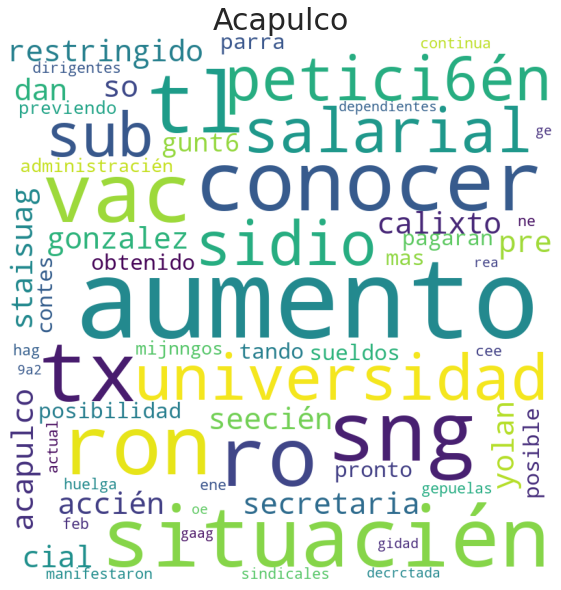

,NombreArchivo,Texto,Index
8,"Ficheros_UAG_76-11-16_a_77-03-19_UAG,_fichas-1...",VAC TX /o ro TL\n\n[Sng a\n\nron a conocer la ...,8


In [16]:
name = "Acapulco"
fuzzy_search.find_matchs_word_cloud(name,df_transcripciones,threshold=50)